In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
import os
import h5py

top_level_dir = os.path.abspath(os.path.join(os.path.dirname("binning.ipynb"), '..'))
sys.path.append(top_level_dir)

from analysis_package import maxlab_analysis as mla

h5_file_path = "/Users/Trevor/Desktop/"

h5_file_name = "data.raw.h5"


In [12]:
spike_df = mla.load_spikes_from_file(h5_file_path + h5_file_name)

In [13]:
with h5py.File(h5_file_path + h5_file_name, "r") as h5_file: #GET SAMP RATE AND MAPPING
        h5_object = h5_file['wells']['well{0:0>3}'.format(0)]['rec{0:0>4}'.format(0)]
        print(list(h5_object))
        #data = pd.DataFrame(np.array(h5_object["spikes"]))
        samp_rate = np.array(h5_object["settings"]["sampling"])[0]
        mapping = pd.DataFrame(np.array(h5_object["settings"]["mapping"]))

['events', 'groups', 'recording_id', 'settings', 'spikes', 'start_time', 'stop_time', 'well_id']


In [17]:
binned_data, spike_data, times  = mla.bin_spike_data(spike_df, mapping, bin_size = 0.02, mode = "count")




In [25]:
mapping

,channel,electrode,x,y
0,0,14309,157.5,1137.5
1,1,16436,2730.0,1295.0
2,2,6402,385.0,507.5
3,3,15616,3780.0,1225.0
4,4,7294,595.0,577.5
...,...,...,...,...
870,1017,18602,2135.0,1470.0
871,1019,22140,2450.0,1750.0
872,1021,4530,2275.0,350.0
873,1022,21854,1295.0,1732.5


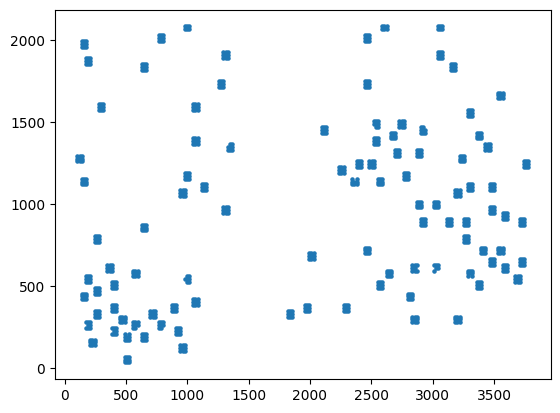

In [34]:
plt.scatter(mapping['x'], mapping['y'], 5)

In [35]:
display(binned_data)


,0,1,2,3,4,5,6,7,9,10,...,1011,1012,1013,1015,1016,1017,1019,1021,1022,1023
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29999,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [87]:
# choose random electrodes (50 each)
randchoice = np.random.choice(mapping['channel'], size = 100, replace = False)

buttonA = randchoice[0: len(randchoice) // 2]
buttonB = randchoice[len(randchoice) // 2: len(randchoice)]

print(buttonA)
print(buttonB)

[ 828  704  911  596 1015  737  512  992   86  643  627   99  721  616
  177  521  196  547  290  890  233  204  759  727  544  771  635  898
  476  305   52  619  711   87  728  629  960  576   84  796  552  223
  322  400  969  304  610   93  990  900]
[ 855    4  724  656  690  500  716  519  560  765  120  652  188 1017
  709  241  693  885  851  710  756  651  280  263  413  840  637  701
  645  757   17  537  238  787  139  940   45  753  328   26   43  791
  283  846  694  739  673  906  373  345]


In [88]:
def get_coords_slice(df, button):
    return df.loc[(np.isin(df["channel"], button)), ["x", "y"]]

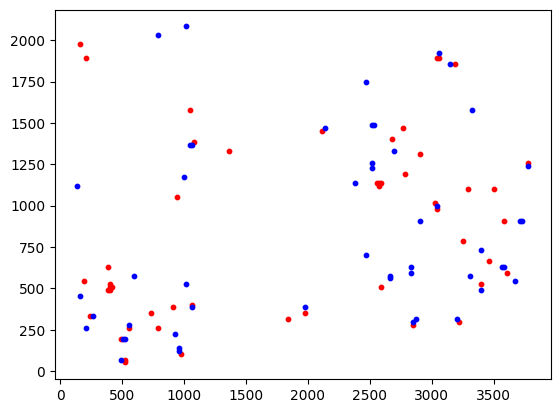

In [89]:
# learn how to slice a pandas data frame
# only plot mapping x and y when 'channel' == buttona 


a_slice = get_coords_slice(mapping, buttonA)
b_slice = get_coords_slice(mapping, buttonB)


plt.scatter(a_slice['x'], a_slice['y'], 10, color="red")
plt.scatter(b_slice['x'], b_slice['y'], 10, color="blue")

In [ ]:
binned_data_a = binned_data['a'].loc[]

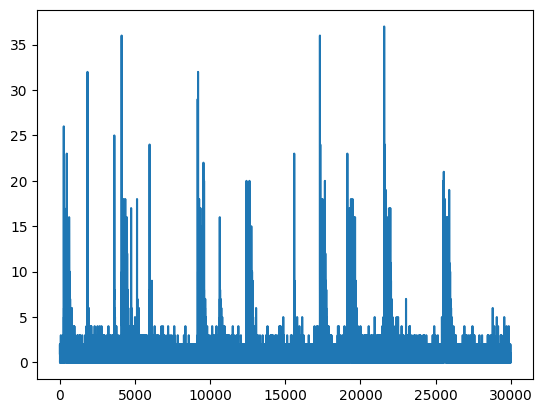

In [102]:
binned_data_a = binned_data.loc[:, buttonA]
a_tot = binned_data_a.sum(axis=1)
plt.plot(a_tot)


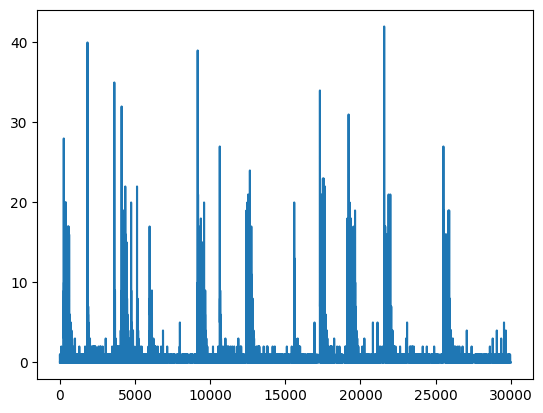

In [103]:
binned_data_b = binned_data.loc[:, buttonB]
b_tot = binned_data_b.sum(axis=1)
plt.plot(b_tot)


(array([  628.,    28.,   250.,   754.,   363.,  2221.,  1044.,   477.,
           86., 11221.]),
 array([-1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 <BarContainer object of 10 artists>)

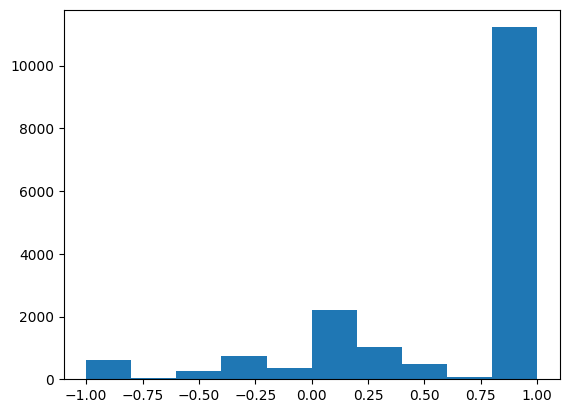

In [110]:
fano = (a_tot-b_tot)/(a_tot+b_tot)

plt.hist(fano)

In [117]:
for i in range(400, 500-10, 10):
    # print(np.average(binned_data_a.iloc[i:i+10]))
    # print(np.std(binned_data_a.iloc[i:i+10]))
    print( np.average(binned_data_a.iloc[i:i+10]) > 3*np.std(binned_data_a.iloc[i:i+10]))

828      True
704     False
911     False
596     False
1015     True
737      True
512      True
992      True
86       True
643     False
627     False
99      False
721     False
616      True
177     False
521     False
196      True
547     False
290      True
890      True
233     False
204     False
759      True
727     False
544      True
771     False
635      True
898     False
476     False
305      True
52      False
619     False
711     False
87       True
728     False
629     False
960      True
576      True
84      False
796     False
552      True
223      True
322     False
400     False
969     False
304      True
610      True
93       True
990     False
900      True
dtype: bool
828      True
704      True
911      True
596      True
1015     True
737      True
512      True
992      True
86       True
643      True
627     False
99       True
721     False
616      True
177     False
521     False
196     False
547      True
290     False
890      True
233     